# Decision Tree On Wine Quality Data Set

# Imports

In [ ]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame

In [ ]:
wine_df = pd.concat(map(pd.read_csv, ['winequality-red.csv', 'winequality-white.csv']), ignore_index=True, axis='rows')
wine_df.head(3)
wine_df.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


(6497, 12)

In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# Heat Map

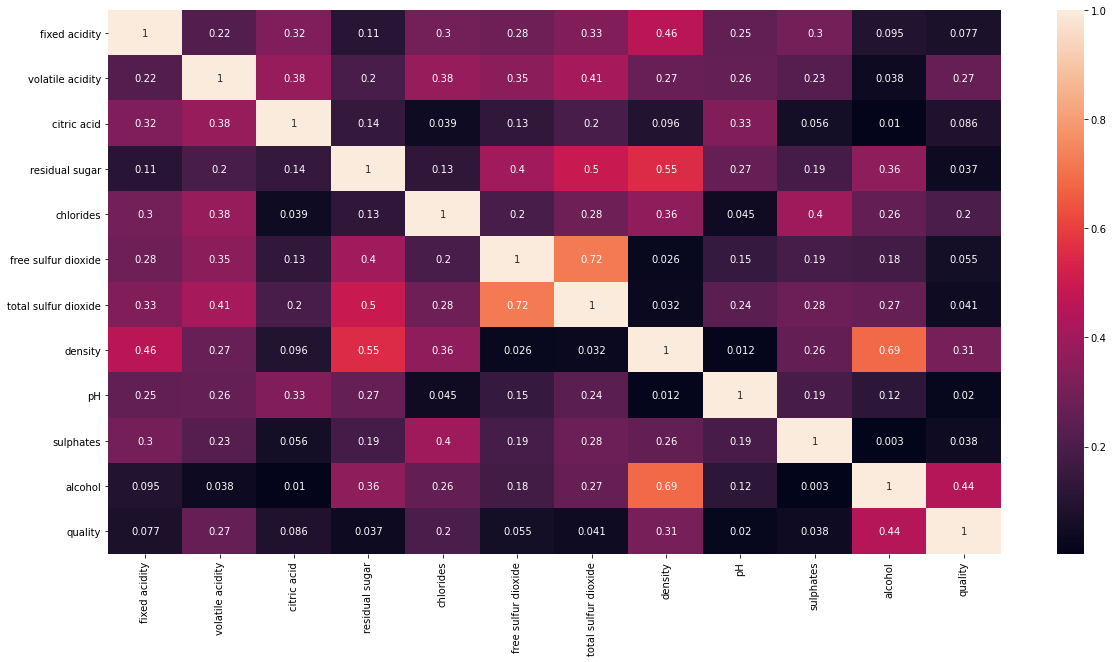

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(wine_df.corr().abs(),  annot=True);

# Imports

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier

# Train Test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

# Decision Tree Classifier

In [ ]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)
print('Train :', Tree.score(x_train, y_train)*100)
print('Test :', Tree.score(x_test, y_test)*100)
print('Cross-validate :', cross_val_score(Tree, x_train, y_train, cv=5)*100)

DecisionTreeClassifier()

Train : 100.0
Test : 65.5
Cross-validate : [63.44725111 66.79049034 69.53937593 70.28231798 72.49070632]


# Grid Search

In [ ]:
params = {'criterion' : ['entropy','gini'],
          'splitter' : ['best','random'],
         'max_depth': [3,5,7,10],
         'min_samples_split': range(2,10),
         'min_samples_leaf': range(2,10)}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [ ]:
gcv.best_params_
gcv.best_score_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'splitter': 'best'}

0.6556727077890155

In [ ]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
print('Train :', model.score(x_train, y_train)*100)
print('Test :', model.score(x_test, y_test)*100)
print('Cross-validate :', cross_val_score(model, x_train, y_train, cv=5)*100)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=4)

Train : 79.72952890474068
Test : 59.08333333333333
Cross-validate : [61.06983655 63.96731055 67.83060921 67.38484398 67.50929368]


<h1 style="color:red;">Result</h1>
<h3>Train Accuracy : 79.72</h3>
<h3>Test Accuracy : 59.08</h3>

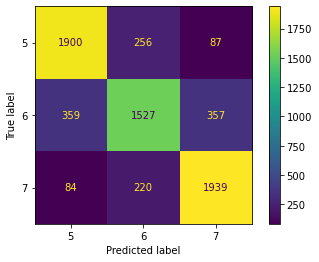

In [ ]:
plot_confusion_matrix(model, x_train, y_train)